In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from astropy.io import ascii
from astropy.table import Table, vstack

Text(0.5, 1.0, 'Pictoris c transits and eclipses')

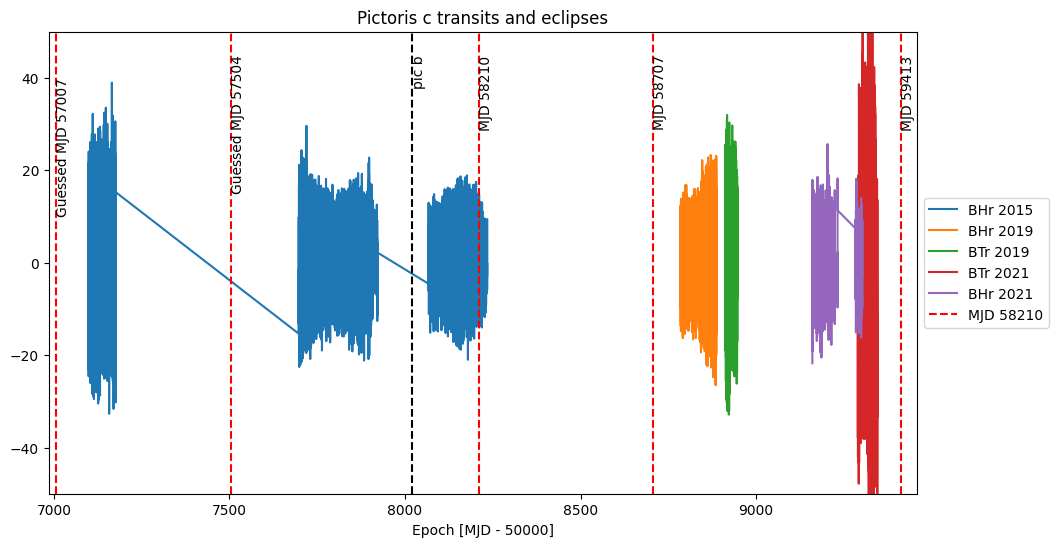

In [2]:
#Retrieve data
Brite_2015 = np.loadtxt('Data/brite/betaPic_2015-16-17-18-BHr.dat', dtype=float)
BHr_2019 = np.loadtxt('Data/brite/betaPic_2019_BHr.dat', dtype=float)
BTr_2019 = np.loadtxt('Data/brite/betaPic_2019_BTr.dat', dtype=float)
BHr_2021 = np.loadtxt('Data/brite/betaPic_2021-BHr-all.dat', dtype=float)
BTr_2021 = np.loadtxt('Data/brite/betaPic_2021-BTr-all.dat', dtype=float)
del_t = (-2400000-57000+7000)+2456000

#Retieve, time, flux and flux error
t_Brite_2015 =Brite_2015[:,0]+del_t
Brite_2015 =Brite_2015[:,1]

t_BHr_2019 =BHr_2019[:,0]+del_t
e_BHr_2019 =BHr_2019[:,2]
BHr_2019 =BHr_2019[:,1]

t_BTr_2019 =BTr_2019[:,0]+del_t
e_BTr_2019 =BTr_2019[:,2]
BTr_2019 =BTr_2019[:,1]

t_BHr_2021 =BHr_2021[:,0]+del_t
e_BHr_2021 =BHr_2021[:,2]
BHr_2021 =BHr_2021[:,1]

t_BTr_2021 =BTr_2021[:,0]+del_t
e_BTr_2021 =BTr_2021[:,2]
BTr_2021=BTr_2021[:,1]

#concate brite data\
t_Brite  = np.concatenate((t_Brite_2015, t_BHr_2019, t_BTr_2019, t_BHr_2021, t_BTr_2021 ))
brite = np.concatenate((Brite_2015, BHr_2019, BTr_2019, BHr_2021, BTr_2021 ))

#plot data and possible transits and eclipses of beta pic c
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.plot(t_Brite_2015, Brite_2015, label = 'BHr 2015') #time = -- 2456000.
ax.plot(t_BHr_2019, BHr_2019, label ='BHr 2019')
ax.plot(t_BTr_2019, BTr_2019, label ='BTr 2019')
ax.plot(t_BTr_2021, BTr_2021, label ='BTr 2021')
ax.plot(t_BHr_2021, BHr_2021, label ='BHr 2021')    

ax.axvline(8210, color = 'red' , label = 'MJD 58210', linestyle = '--')
ax.axvline(58707-57000+7000, color = 'red' , linestyle = '--')
ax.axvline(59413-57000+7000, color = 'red' , linestyle = '--')
ax.axvline(8707-(9413-8210), color = 'red', linestyle = '--')
ax.axvline(8210-(9413-8210), color = 'red' , linestyle = '--')
ax.axvline(8020, color = 'black' , linestyle = '--')
ax.set_xlabel('Epoch [MJD - 50000]')
ax.set_ylabel('')
ax.legend()
ax.set_ylim(-50, 50)
text(8020, 45, "pic b" , rotation=90, verticalalignment='top')
text(8210, 45, "MJD 58210" , rotation=90, verticalalignment='top')
text(8707, 45, "MJD 58707" , rotation=90, verticalalignment='top')
text(9413, 45, "MJD 59413" , rotation=90, verticalalignment='top')
text(7504, 45, "Guessed MJD 57504" , rotation=90, verticalalignment='top')
text(7007, 25, "Guessed MJD 57007" , rotation=90, verticalalignment='center')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pictoris c transits and eclipses')


In [3]:
# BRITE residual light curves are in millimagnitudes with the mean magnitude subtracted.
# The first column is HJD (mid exposure) - 2456000.0 in days.

fname_out = 'Data/brite/brite_all_R.fits'

#only use data from BHr, as BTR data has been found to be inconsistent
t1 = ascii.read('Data/brite/betaPic_2015-16-17-18-BHr.dat')
t2 = ascii.read('Data/brite/betaPic_2019_BHr.dat')
t3 = ascii.read('Data/brite/betaPic_2021-BHr-all.dat')
t_b = vstack([t1,t2,t3])

# convert to MJD
time = t_b['col1'] + 2456000.0 - 2400000.5

# the second column is in millimagnitudes
# convert to normalised flux - 1
f1 = np.power(10.,( ((t_b['col2']/1000.)/-2.5))) - 1.

t =data = Table([time, f1], names=('time','flux'))
t.write(fname_out, overwrite=True)